In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('spotify-2023.csv' ,encoding='ISO-8859-1')

In [5]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
# Handling duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Convert 'released_month' and 'released_day' to categorical variables
df['released_month'] = pd.Categorical(df['released_month'], categories=range(1, 13), ordered=True)
df['released_day'] = pd.Categorical(df['released_day'], categories=range(1, 32), ordered=True)

In [9]:
# Convert 'released_year' to datetime type
df['released_year'] = pd.to_datetime(df['released_year'], format='%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   released_year         953 non-null    datetime64[ns]
 4   released_month        953 non-null    category      
 5   released_day          953 non-null    category      
 6   in_spotify_playlists  953 non-null    int64         
 7   in_spotify_charts     953 non-null    int64         
 8   streams               953 non-null    object        
 9   in_apple_playlists    953 non-null    int64         
 10  in_apple_charts       953 non-null    int64         
 11  in_deezer_playlists   953 non-null    object        
 12  in_deezer_charts      953 non-null    int64         
 13  in_shazam_charts    

In [11]:
df['track_name'].loc[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

574    Love Grows (Where My Rosemary Goes)
Name: track_name, dtype: object

In [12]:
df.loc[df['track_name'] == 'Love Grows (Where My Rosemary Goes)', 'streams'] = 209536449
df['track_name'].loc[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

Series([], Name: track_name, dtype: object)

In [13]:
#conveter streams data into integer data type
df['streams'] = df['streams'].astype('int64')

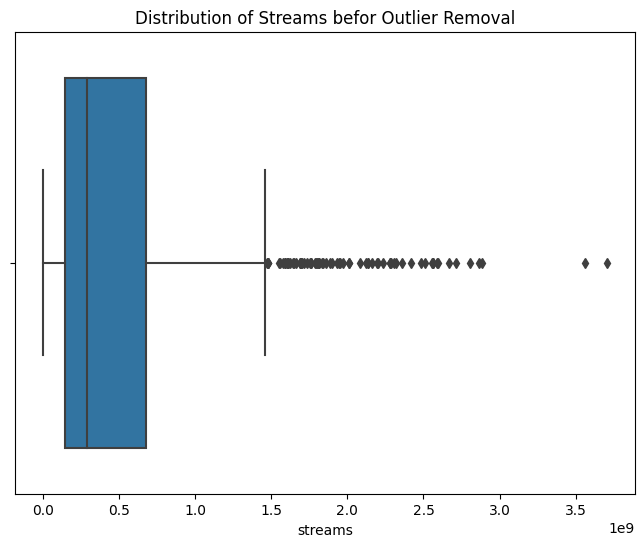

In [14]:
# Distribution of 'streams' before outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['streams'])
plt.title('Distribution of Streams befor Outlier Removal')
plt.show()

In [15]:
# Detect and handle outliers in 'streams' using IQR method
Q1 = df['streams'].quantile(0.25)
Q3 = df['streams'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

df = df[(df['streams'] >= Q1 - outlier_threshold) & (df['streams'] <= Q3 + outlier_threshold)]

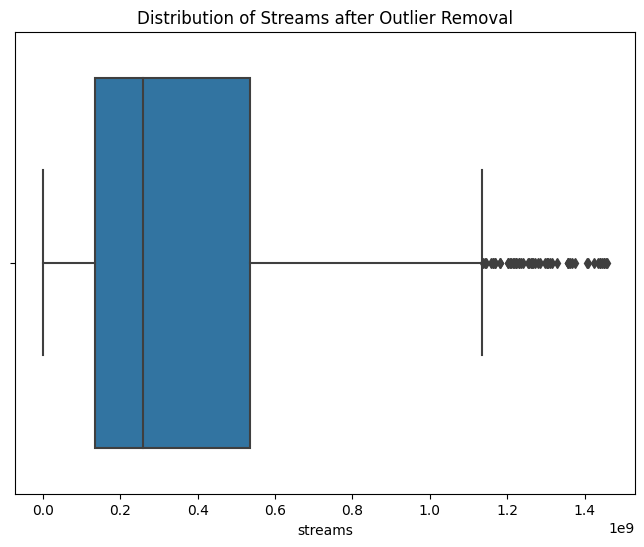

In [16]:
# Distribution of 'streams' after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['streams'])
plt.title('Distribution of Streams after Outlier Removal')
plt.show()

In [17]:
# Distribution of artists across songs
artist_distribution = df['artist(s)_name'].value_counts()
print(artist_distribution)

Taylor Swift                                               34
Bad Bunny                                                  19
SZA                                                        19
The Weeknd                                                 18
Harry Styles                                               15
                                                           ..
Duki, NICKI NICOLE, Cris Mj, Standly, Stars Music Chile     1
Jack Black                                                  1
Mac DeMarco                                                 1
The Walters                                                 1
Feid, Sech, Jhayco                                          1
Name: artist(s)_name, Length: 612, dtype: int64


In [18]:
# Correlation between artist_count and streams
correlation_artist_streams = df['artist_count'].corr(df['streams'])
print(correlation_artist_streams)

-0.1278845099633311


In [19]:
# Prolific artists based on playlist inclusions
prolific_artists = df.groupby('artist(s)_name')['in_spotify_playlists'].sum().sort_values(ascending=False)
print(prolific_artists)

artist(s)_name
Taylor Swift                                  132974
Dr. Dre, Snoop Dogg                            65728
Harry Styles                                   64536
The Weeknd                                     59239
Pharrell Williams, Nile Rodgers, Daft Punk     52898
                                               ...  
RM, Colde                                        105
Arijit Singh, Sachin-Jigar                        86
Natanael Cano                                     86
Shubh                                             67
Jack Black                                        34
Name: in_spotify_playlists, Length: 612, dtype: int64


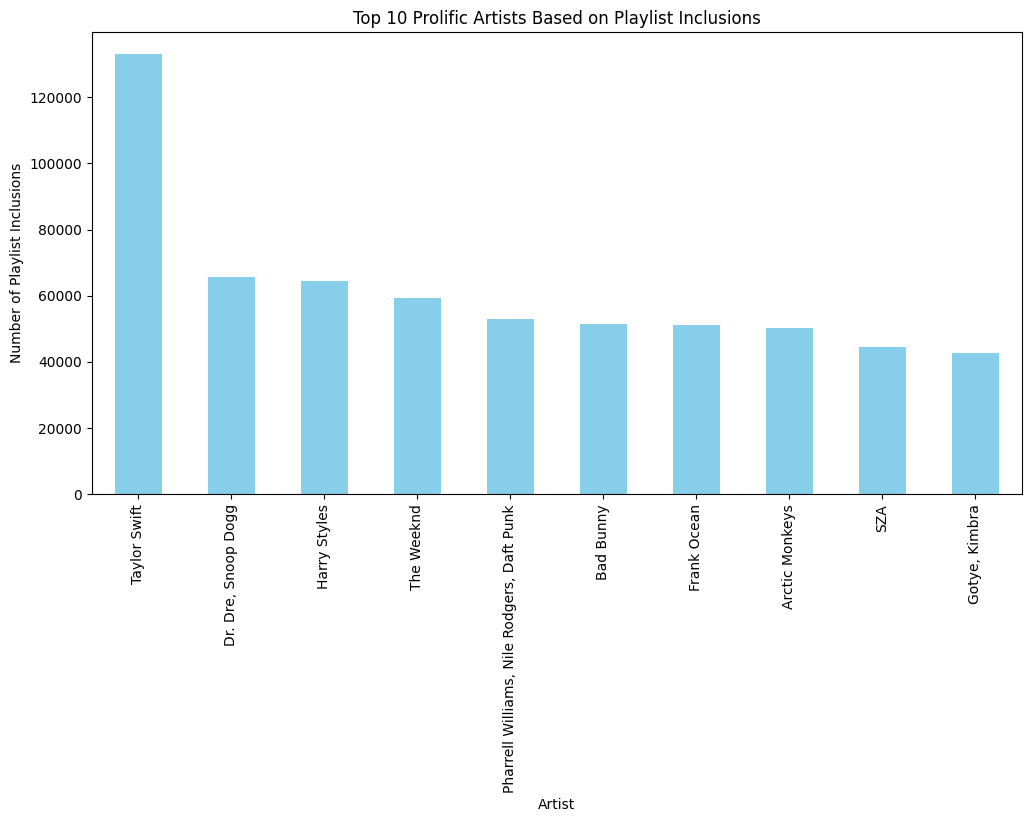

In [20]:
#Plot of top 10 prolific artists based on playlist inclusions
plt.figure(figsize=(12, 6))
prolific_artists.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Prolific Artists Based on Playlist Inclusions')
plt.xlabel('Artist')
plt.ylabel('Number of Playlist Inclusions')
plt.show()

In [21]:
# Distribution of releases over years, months, and days
release_years = df['released_year'].value_counts()
release_months = df['released_month'].value_counts()
release_days = df['released_day'].value_counts()

In [22]:
# Correlation between release timing and streaming performance
correlation_release_streams = df['released_month'].corr(df['streams'])
print(correlation_release_streams)

-0.05472787189965292


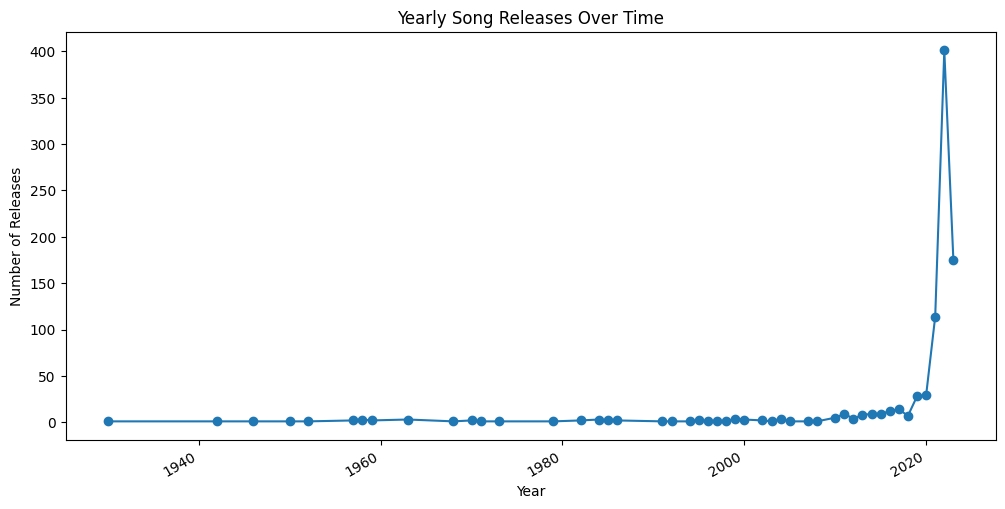

In [23]:
# Time series plot for yearly song releases
plt.figure(figsize=(12, 6))
release_years.sort_index().plot(kind='line', marker='o')
plt.title('Yearly Song Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

In [24]:
# Correlation between playlist inclusions and streams
correlation_playlist_streams = df['in_spotify_playlists'].corr(df['streams'])
print(correlation_playlist_streams)

0.7030996363174634


In [25]:
# Correlation between chart presence and streams
correlation_chart_streams = df['in_spotify_charts'].corr(df['streams'])
print(correlation_chart_streams)

0.18842728395574507


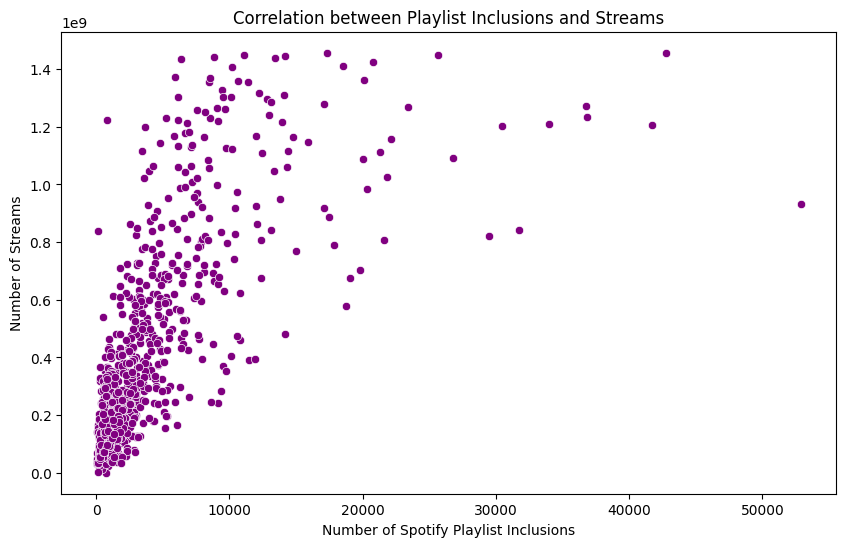

In [26]:
# Scatter plot to visualize the correlation between playlist inclusions and streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='in_spotify_playlists', y='streams', data=df, color='purple')
plt.title('Correlation between Playlist Inclusions and Streams')
plt.xlabel('Number of Spotify Playlist Inclusions')
plt.ylabel('Number of Streams')
plt.show()

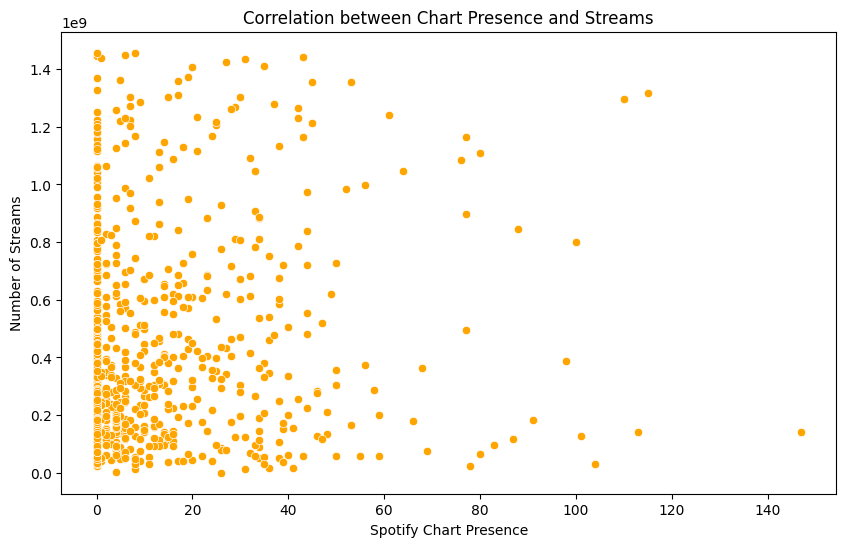

In [27]:
# Scatter plot to visualize the correlation between chart presence and streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='in_spotify_charts', y='streams', data=df, color='orange')
plt.title('Correlation between Chart Presence and Streams')
plt.xlabel('Spotify Chart Presence')
plt.ylabel('Number of Streams')
plt.show()

In [28]:
# Correlation between Spotify and Apple Music metrics
correlation_spotify_apple = df['streams'].corr(df['in_apple_playlists'])
print(correlation_spotify_apple)

0.6380375769349047


<Figure size 1000x800 with 0 Axes>

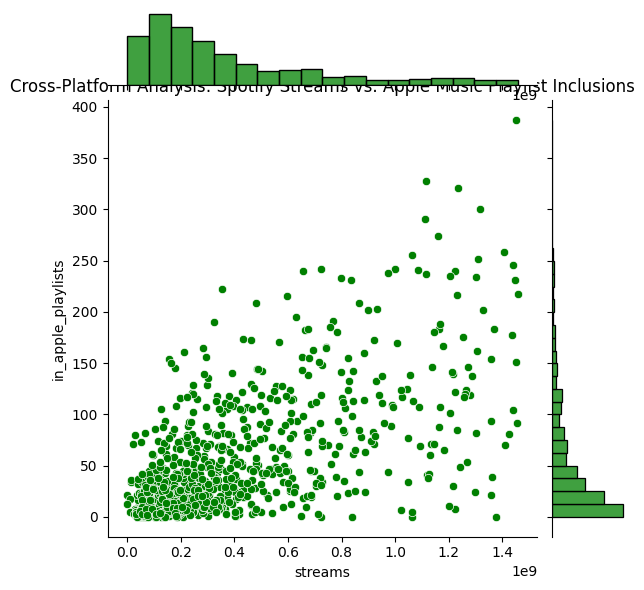

In [29]:
#  Cross-Platform Analysis Visualization
# Joint plot to visualize the relationship between Spotify and Apple Music metrics
plt.figure(figsize=(10, 8))
sns.jointplot(x='streams', y='in_apple_playlists', data=df, kind='scatter', color='green')
plt.title('Cross-Platform Analysis: Spotify Streams vs. Apple Music Playlist Inclusions')
plt.show()

In [30]:
# Correlation matrix for musical features
musical_features = df[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']]
correlation_matrix = musical_features.corr()

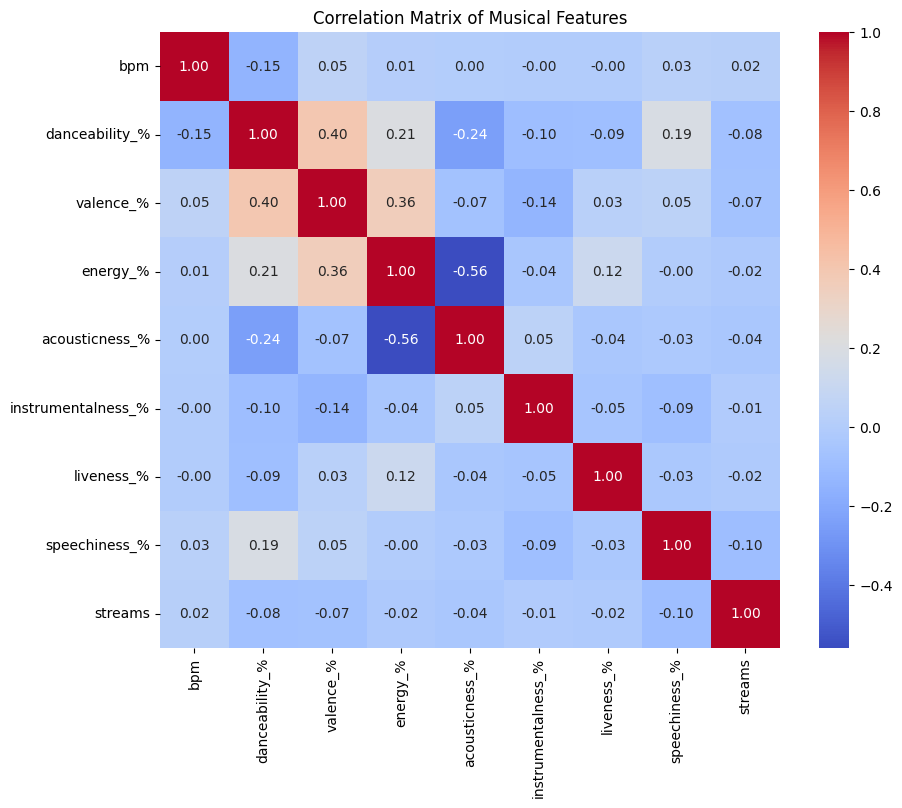

In [31]:
# Visualization of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Musical Features')
plt.show()

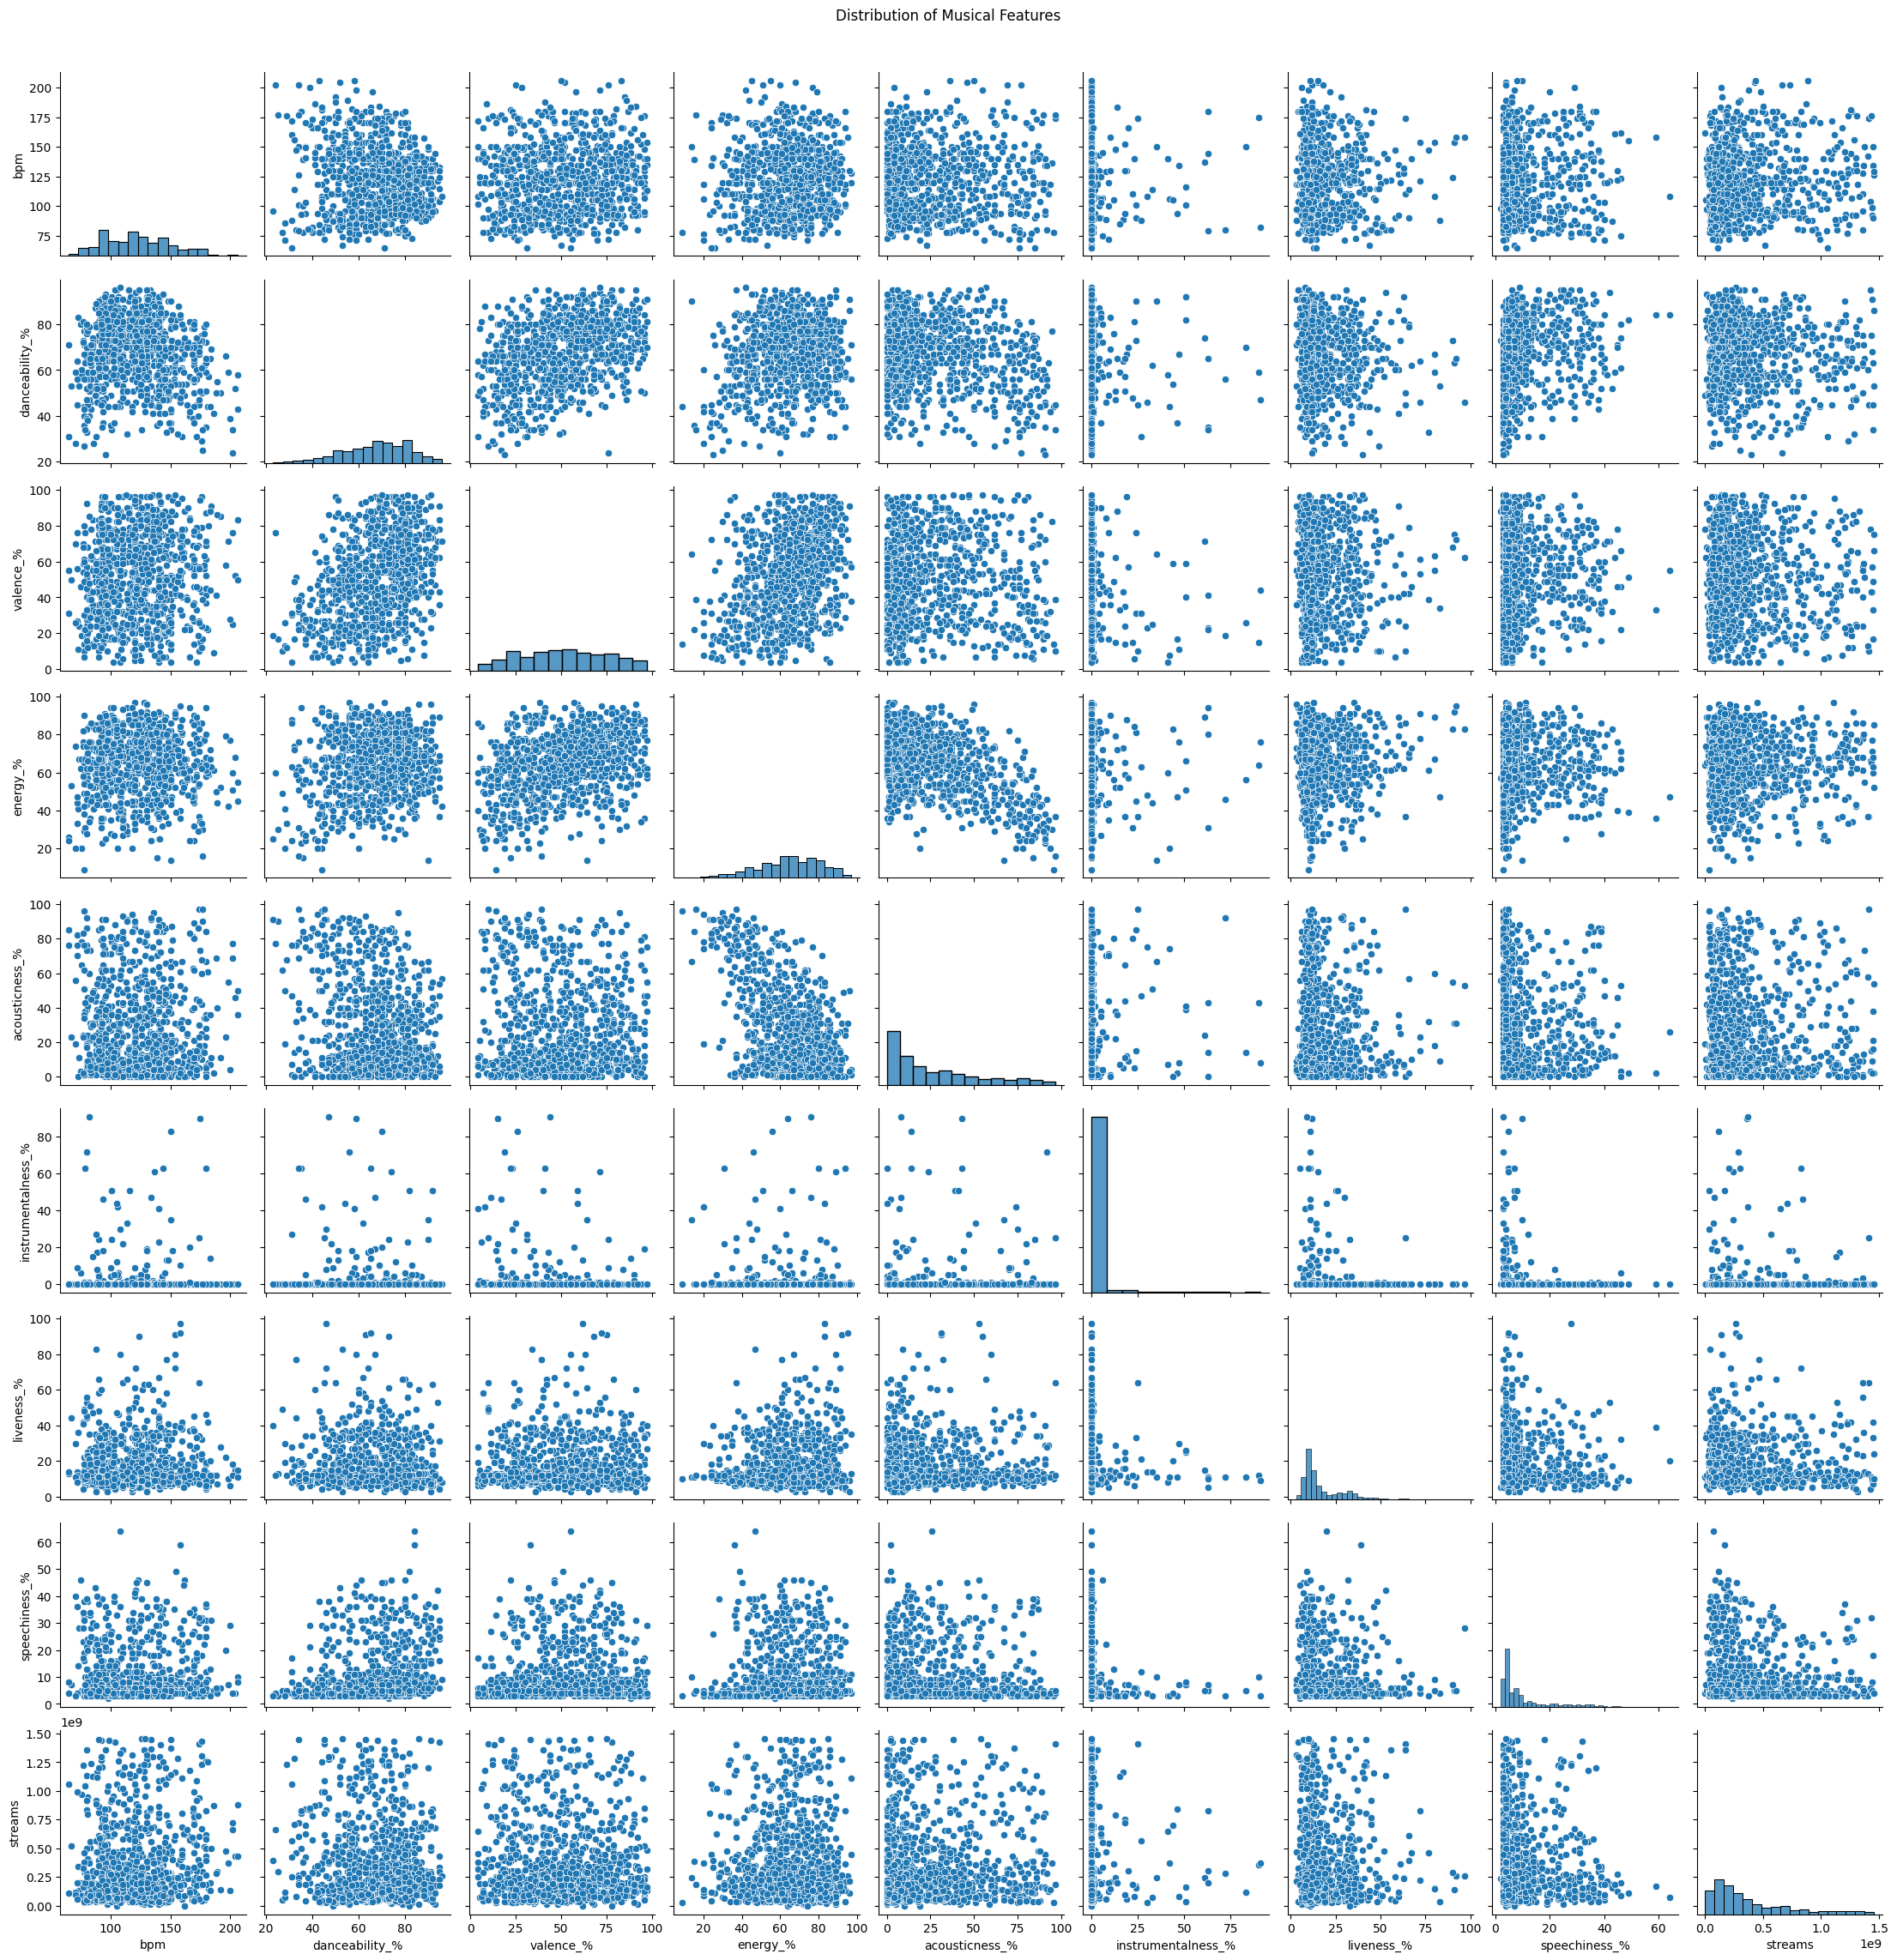

In [32]:
#  Distribution of Musical Features
# Pair plot to visualize the distribution of musical features
sns.pairplot(df[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']])
plt.suptitle('Distribution of Musical Features', y=1.02)
plt.show()